In [26]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from matplotlib.font_manager import FontProperties
import os

In [27]:
font_path = 'C:\\Windows\\Fonts\\simsun.ttc'  # 宋體
font_prop = FontProperties(fname=font_path)

mode = 'show'   # 'show' or 'save'

In [ ]:
def calculate_PPG(waveform, Name, i, mode, hands):
    

In [ ]:
def plot_ppg(waveform, Name, i, mode, hands):
    

In [28]:
def plot_d1(derivative, Name, i, Feature):
    
    x = np.linspace(0, len(derivative), len(derivative))
    plt.figure()
    plt.plot(derivative)
    plt.plot(x[Feature], derivative[Feature], '*', label='Peak')
    plt.title(f'{Name}, {i + 1}th Left_Right',fontproperties=font_prop)
    plt.legend()
    plt.grid()
    plt.show()

In [29]:
def calculate_d1(waveform, Name, i, mode, hands):
    
    d1_peak_x, d1_peak_y = find_peaks(waveform, height=0, distance=800)
    d1_valley_x,d1_valley_y = find_peaks(waveform * -1, height=0, distance=800)

    d1_peak_y = d1_peak_y['peak_heights']
    d1_valley_y = d1_valley_y['peak_heights']

    print(d1_peak_y, d1_valley_y)

    if mode == 'show':
        plot_d1(waveform, Name, i, d1_peak_x)

In [30]:
def plot_d2(waveform, derivative, Name, i, Feature, hands, locate):
    
    x = np.linspace(0, len(derivative), len(derivative))
    plt.figure()
    
    plt.plot(waveform)
    plt.plot(derivative[5:1995])
    plt.plot(x[Feature], waveform[Feature], '*', label='Peak')
    plt.title(f'{Name}, {i}th {hands}',fontproperties=font_prop)
    plt.legend()
    plt.grid()
    if mode == 'show':
        plt.show()

In [31]:
def calculate_d2(waveform, derivative, Name, i, mode, hands):
    zero_crossings = np.where(np.diff(np.sign(derivative)))[0]


    if mode =='show':
        plot_d2(waveform,derivative, Name, i, zero_crossings, hands, "F:\\TDPPG")
        print(zero_crossings)

自動
Normal1
[0.69125533 0.62724386] [0.18383172 0.17213055]


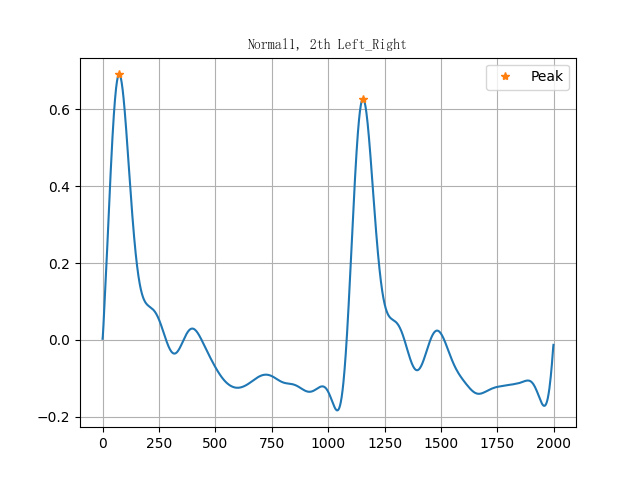

自動
Normal2
[0.68178821 0.67191562] [0.14945438 0.16940645]


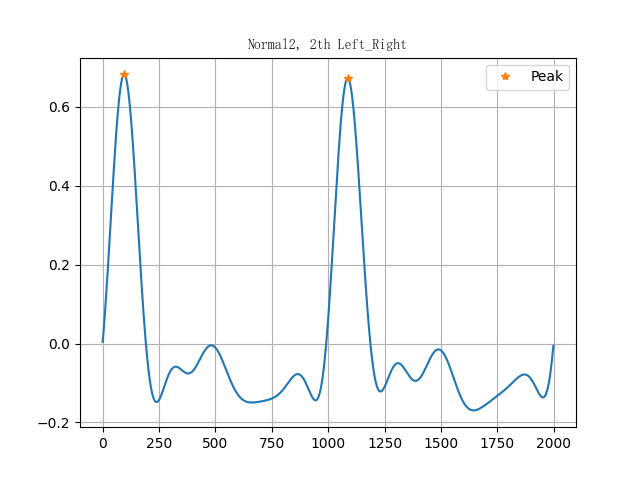

手動
['Normal3', ' 1th left d1.npy']
[0.6474641  0.62292218] [0.18639912 0.21437138]


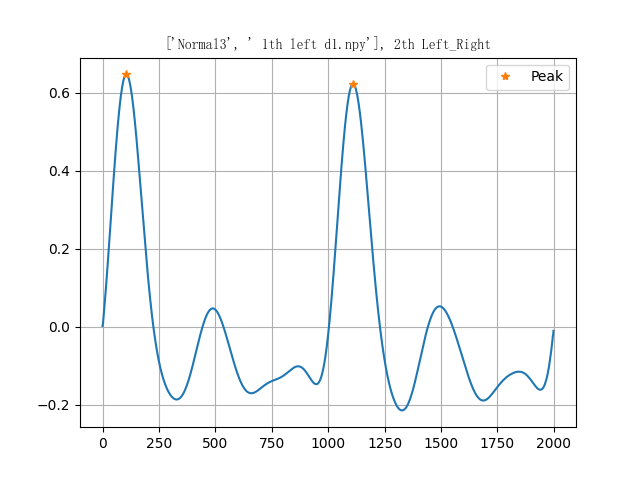

找不到檔案
自動
Normal5
[0.81111794 0.77127746] [0.21523139 0.22889253]


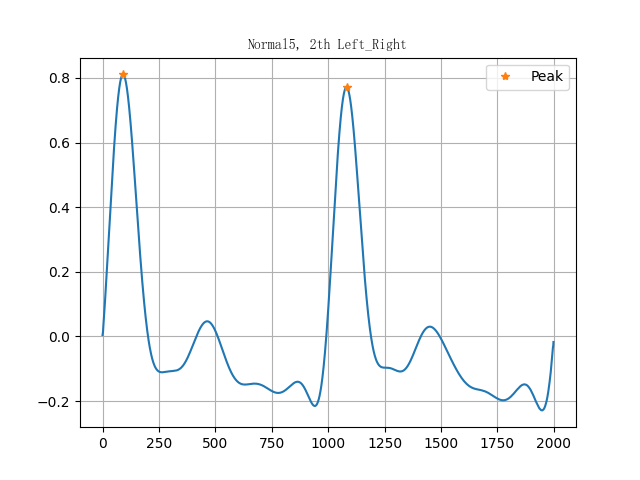

自動
Normal6
[0.67919959 0.68259031] [0.18163225 0.16628104]


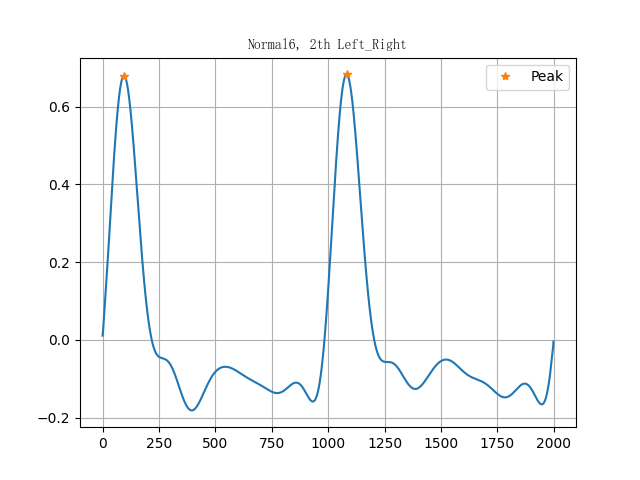

手動
['Normal7', ' 1th left d1.npy']
[0.6162323  0.61001823] [0.19708542 0.19912492]


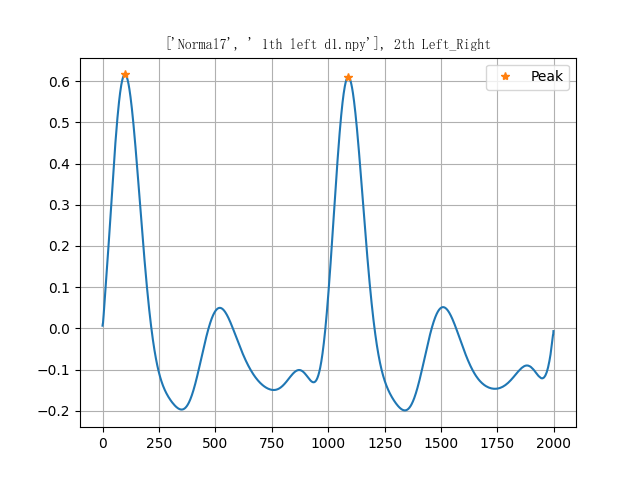

自動
Normal8
[0.66024103 0.581375  ] [0.15867865 0.24926609]


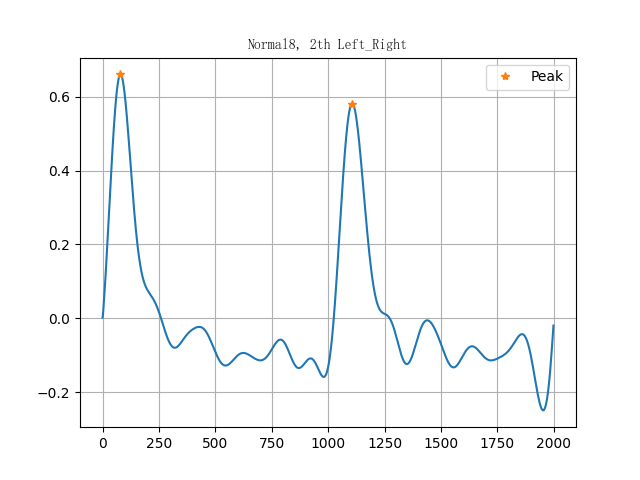

手動
['Normal9', ' 1th left d1.npy']
[0.65670138 0.77008288] [0.23050251 0.22095039]


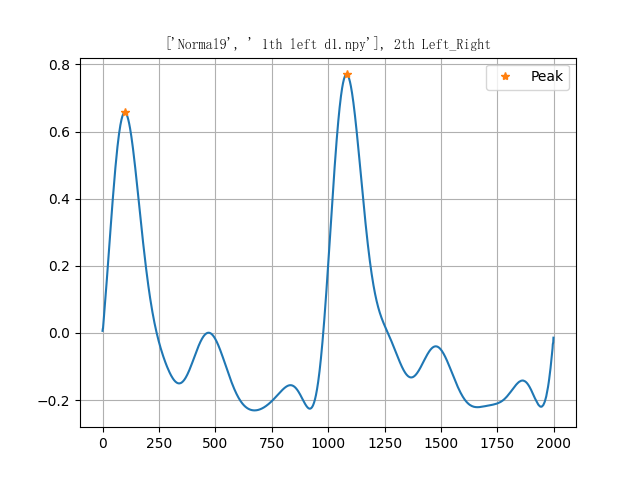

自動
Normal10
[0.76220936 0.69023439] [0.17516329 0.17881497]


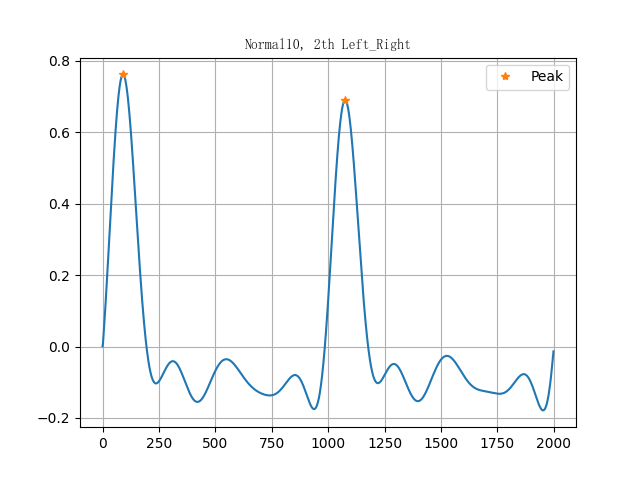

自動
Normal11
[0.58947248 0.62110056] [0.22225513 0.23633609]


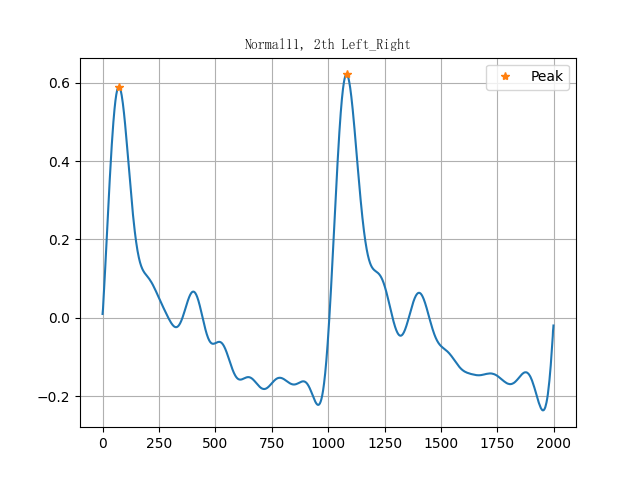

自動
Normal12
[0.67383652 0.67030693] [0.1680777  0.16234469]


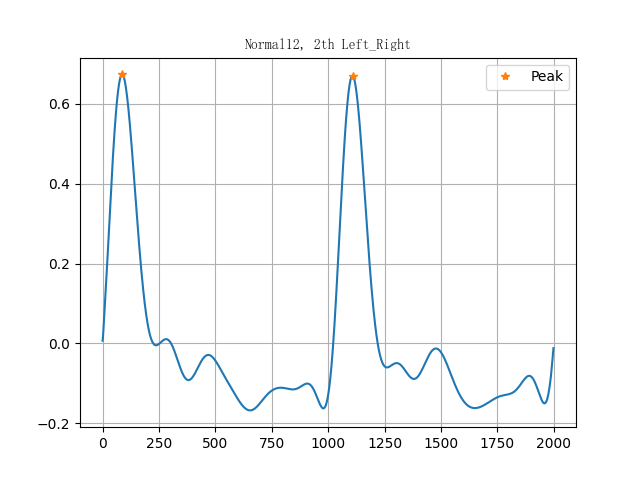

自動
Normal13
[0.66483256 0.64209483] [0.16430558 0.16156356]


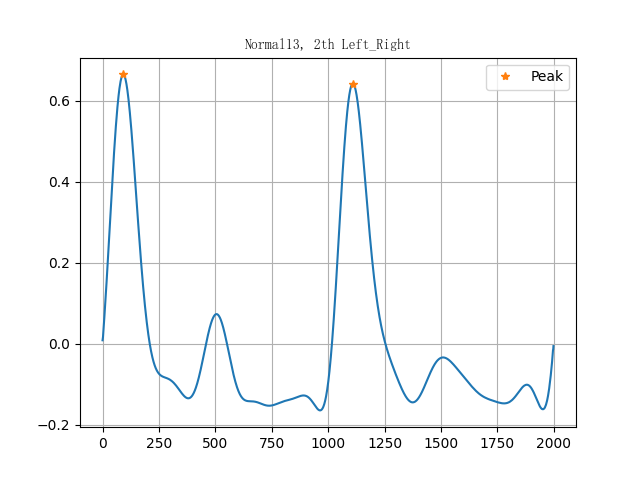

自動
Normal14
[0.59851408 0.5945995 ] [0.14340235 0.14787244]


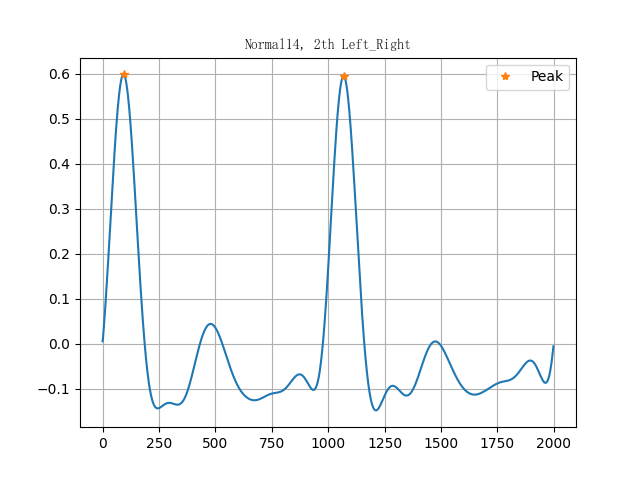

自動
Normal15
[0.60748459 0.67118672] [0.18321211 0.19278252]


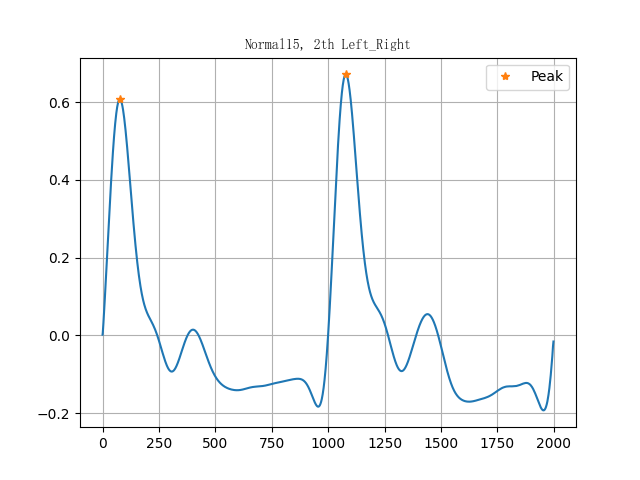

自動
Normal16
[0.616823   0.60289716] [0.18653988 0.18143715]


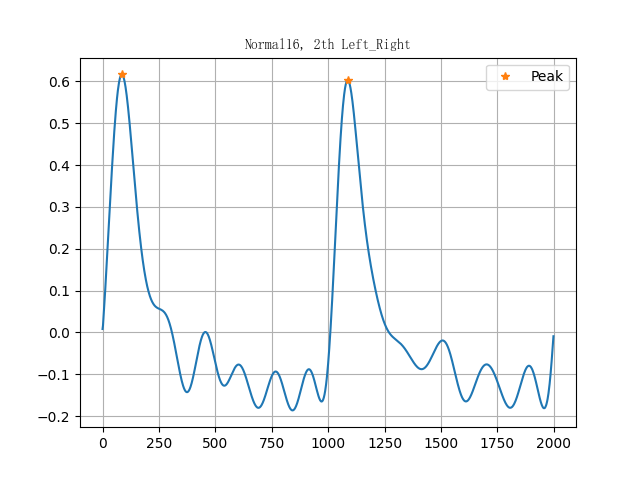

找不到檔案
自動
Normal18
[0.4528331  0.43842939] [0.17683354 0.20030126]


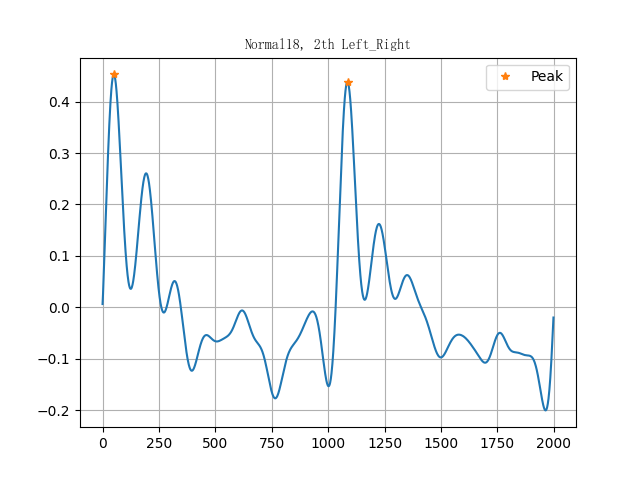

自動
Normal19
[0.64497877 0.62473172] [0.14355324 0.17269863]


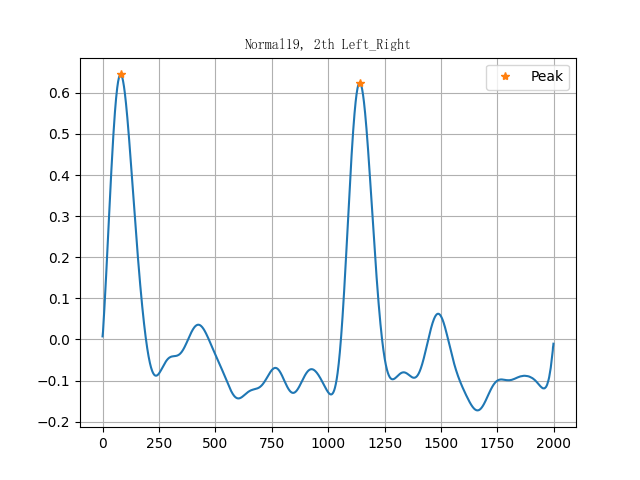

In [32]:
#!d1
for j in range(1,10):
    Name = j
    i = 1
    hands = 0


    if hands == 0:
        hands = 'left'
    else:
        hands = 'right'

    file = f'F:\\All data\\Normal_Signal\\Normal{Name}, {i}th {hands} d1.npy'
    file2 = f'F:\\All data\\Normal_Signal\\bad signal\\Normal{Name}, {i}th {hands} d1.npy'
    # 若找不到檔案，換另一個位址
    if os.path.isfile(file):
        print("自動")
        Name = file.split('\\')[3].split(',')[0]
        i = int(file.split('\\')[3].split(',')[1].split(' ')[1][:-2])
        hand = file.split('\\')[3].split(',')[1].split(' ')[2]
        data = np.load(file)
    elif os.path.isfile(file2):
        print("手動")
        Name = file.split('\\')[3].split(',')
        i = int(file.split('\\')[3].split(',')[1].split(' ')[1][:-2])
        hand = file.split('\\')[3].split(',')[1].split(' ')[2]
        data = np.load(file2)
    else:
        print("找不到檔案")
        continue
    print(Name)

    d3 = np.gradient(data, axis=0) * 50
    d3 = np.where(d3 > 0.1, 0.5, -0.5)

    calculate_d1(data, Name, i,'show', hands)

In [33]:
#!d2
for j in range(1, 20):   
    Name = j
    i = 1
    hands = 0


    if hands == 0:
        hands = 'left'
    else:
        hands = 'right'

    file = f'F:\\Normal_Signal\\Normal{Name}, {i}th {hands} d2.npy'
    file2 = f'F:\\Normal_Signal\\bad signal\\Normal{Name}, {i}th {hands} d2.npy'
    # 若找不到檔案，換另一個位址
    if os.path.isfile(file):
        print("自動")
        Name = file.split('\\')[3].split(',')[0]
        i = int(file.split('\\')[3].split(',')[1].split(' ')[1][:-2])
        hand = file.split('\\')[3].split(',')[1].split(' ')[2]
        data = np.load(file)
    elif os.path.isfile(file2):
        print("手動")
        Name = file.split('\\')[3].split(',')
        i = int(file.split('\\')[3].split(',')[1].split(' ')[1][:-2])
        hand = file.split('\\')[3].split(',')[1].split(' ')[2]
        data = np.load(file2)
    else:
        print("找不到檔案")
        continue
    print(Name)

    d3 = np.gradient(data, axis=0) * 50
    d3 = np.where(d3 > 0.1, 0.5, -0.5)

    calculate_d2(data, d3, Name, i, 'show', hand)


找不到檔案
找不到檔案
找不到檔案
找不到檔案
找不到檔案
找不到檔案
找不到檔案
找不到檔案
找不到檔案
找不到檔案
找不到檔案
找不到檔案
找不到檔案
找不到檔案
找不到檔案
找不到檔案
找不到檔案
找不到檔案
找不到檔案
